In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

LW=load_wine()
df_wine=pd.DataFrame(data=LW.data,columns=LW.feature_names)
df_wine.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


# Relación lineal entre `alcohol` y `alcalinity_of_ash`

In [ ]:
minimize?

In [ ]:
# Definición del criterio de optimización
#
def minimosCuadrados(w,x,y):
  f=w[0]+w[1]*x            # función lineal
  return np.mean((f-y)**2) # promedio de los errores, entre la función y los datos, al cuadrado

In [ ]:
w0=np.random.rand(2) # Condición inicial. 2 elementos aleatorios
opt_alcohol=minimize(minimosCuadrados,w0,args=(df_wine['alcohol'],df_wine['alcalinity_of_ash']))
opt_alcohol

Encontramos una relación entre `alcohol` y `alcalinity_of_ash` de la forma
$$
f=36.1-1.27alcohol,
$$
con un error cuadrático medio de 10.023.

In [ ]:
plt.scatter(df_wine['alcohol'],df_wine['alcalinity_of_ash'],s=5) # Datos
f=opt_alcohol.x[0]+opt_alcohol.x[1]*df_wine['alcohol']           # Función lineal encontrada
plt.plot(df_wine['alcohol'],f,'r')                               # Eeehhhh, gráfica
plt.grid()

# Relación lineal entre `ash` y `alcalinity_of_ash`

In [ ]:
w0=np.random.rand(2) # Otras condiciones iniciales
opt_ash=minimize(minimosCuadrados,w0,args=(df_wine['ash'],df_wine['alcalinity_of_ash']))
opt_ash

Encontramos una relación entre `ash` y `alcalinity_of_ash` de la forma
$$
f=6.72+5.40ash,
$$
con un error cuadrático medio de 8.91.

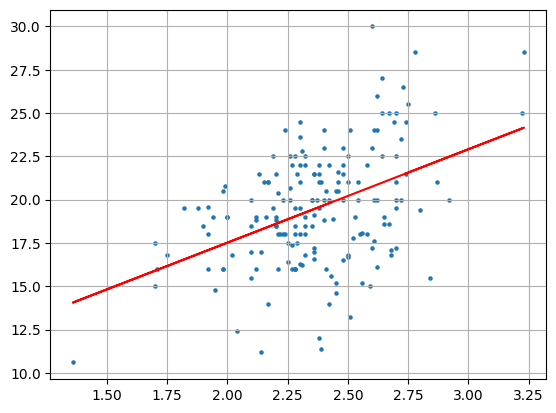

In [ ]:
plt.scatter(df_wine['ash'],df_wine['alcalinity_of_ash'],s=5)
f=opt_ash.x[0]+opt_ash.x[1]*df_wine['ash']
plt.plot(df_wine['ash'],f,'r')
plt.grid()

# Usando la clase de `SKLearn`

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_wine['alcohol'].shape

(178,)

In [ ]:
df_wine[['alcohol']].shape

(178, 1)

In [ ]:
regressor_alcohol=LinearRegression()
regressor_alcohol.fit(df_wine[['alcohol']],df_wine['alcalinity_of_ash'])

LinearRegression()

In [ ]:
regressor_alcohol.coef_

array([-1.2761963])

In [ ]:
regressor_alcohol.intercept_

36.08628435556851

In [ ]:
# R^2
# Si R^2 >= 0.8 descartamos una variable.
regressor_alcohol.score(df_wine[['alcohol']],df_wine['alcalinity_of_ash'])

0.09624584016183024

In [ ]:
#@title Relación entre las variables `ash` y `alcohol` con `alcalinity_of_ash`
regressor=LinearRegression()

regressor.fit(df_wine[['ash','alcohol']],df_wine['alcalinity_of_ash'])
regressor.score(df_wine[['ash','alcohol']],df_wine['alcalinity_of_ash'])

0.36745963729790754

In [ ]:
regressor.coef_

array([ 6.48622306, -1.73988451])

In [ ]:
regressor.intercept_

26.764761443091995

In [ ]:
w0=np.random.rand(3)
def minCuad(w,x1,x2,y):
  f=w[0]+w[1]*x1+w[2]*x2
  return ...